In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def alpha_bar(x):
    return 1/8*(x + 1)**2

def eigen_generator(n):
    # n >= 1
    return 1 / ((n-0.5)**2 * np.pi**2)

def eigen_func(x, eigen_value):
    # n >= 1
    return np.sqrt(2)*np.sin(x / np.sqrt(eigen_value))

eigen_func = np.vectorize(eigen_func)
alpha_bar = np.vectorize(alpha_bar)

def karhunen_loueve(eigen_values, eigen_function_values):
    n = len(eigen_values)  # number of terms to add
    sum = 0
    
    for i in range(n):
        sum += np.sqrt(eigen_values[i]) * eigen_function_values[:,i] * np.random.normal()
        
    return sum
        
    
    

In [3]:
first_3_eigens  = eigen_generator(np.arange(1,3+1))

x_domain = np.linspace(0,1,201)
y_values = np.zeros((201, 3))

for i in range(3):  # generate the eigenfunctions from [0, 1] 
    y_values[:,i] = eigen_func(x_domain, first_3_eigens[i])
    
mean_alpha = alpha_bar(x_domain)

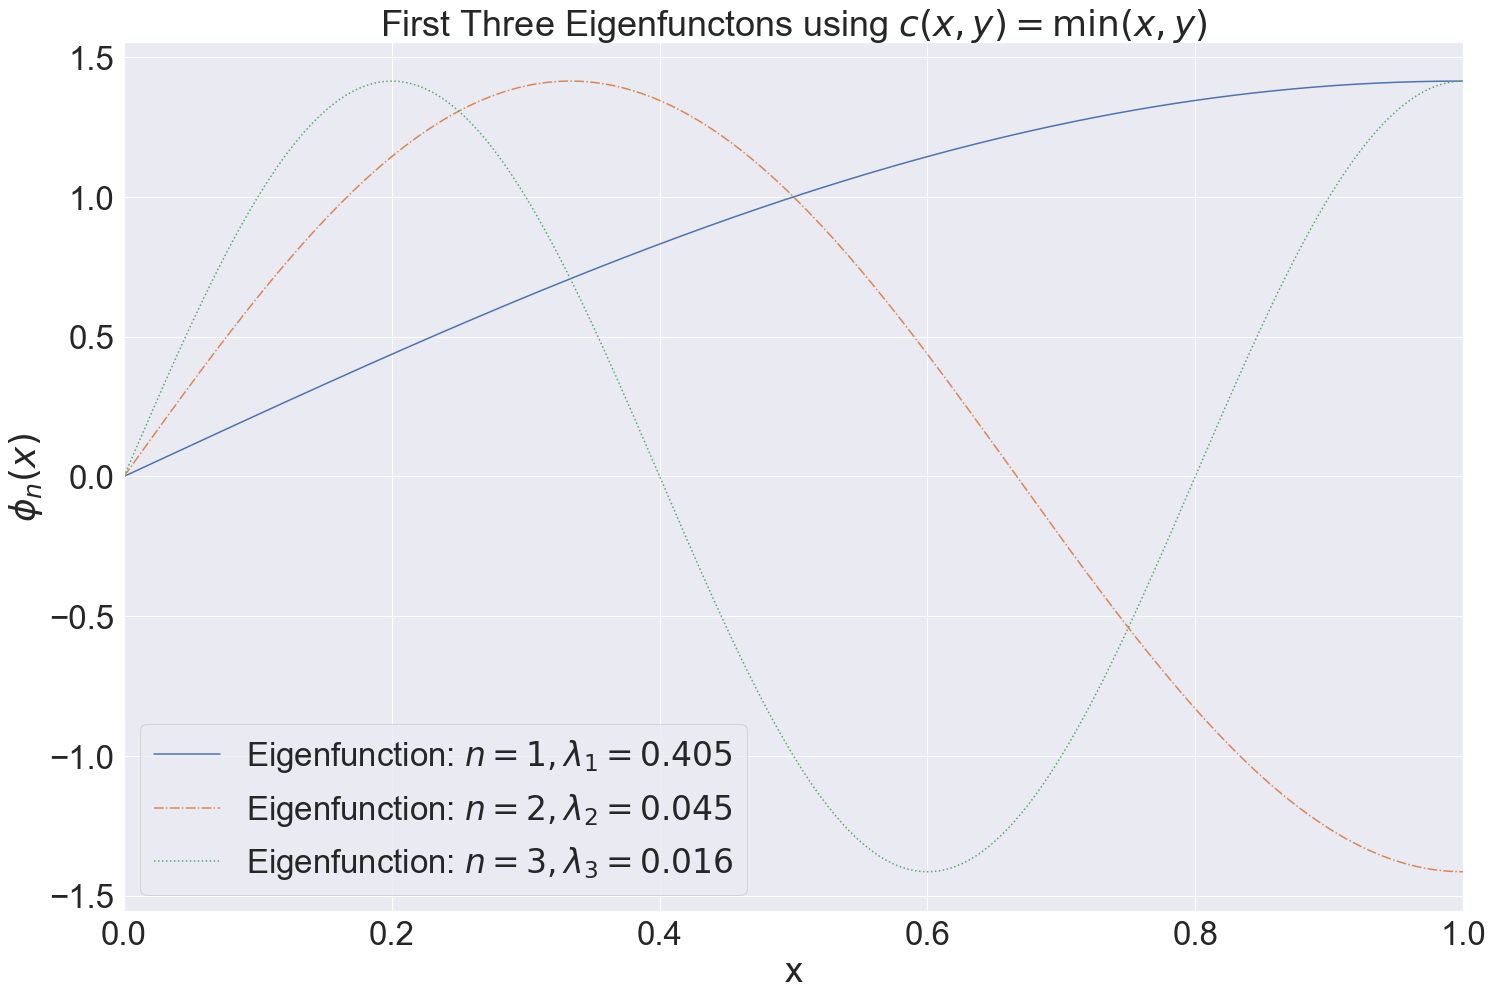

In [4]:
sns.set(font_scale=3)
fig, ax = plt.subplots(ncols=1, figsize=(24, 16))

linestyles =['-','-.', ':' ]

for i in range(3):
    plt.plot(x_domain, y_values[:,i], ls=linestyles[i],label=r'Eigenfunction: $ n={},\lambda_{{{}}}= {{{:0.3f}}}$'.format(i+1,i+1,first_3_eigens[i]))
plt.legend()
ax.set_xlim((0,1))
ax.set_xlabel('x')
ax.set_ylabel(r'$\phi_n(x)$')

plt.title(r'First Three Eigenfunctons using $c(x,y)= {\mathrm{min}}(x,y)$');


In [5]:

realizations = 1000

realization_array = np.zeros((realizations, x_domain.shape[0]))

for i in range(realizations):
    realization_array[i,:]=mean_alpha + karhunen_loueve(first_3_eigens, y_values)
    

C:\Users\adamc\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  if sys.path[0] == '':
C:\Users\adamc\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  del sys.path[0]
C:\Users\adamc\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


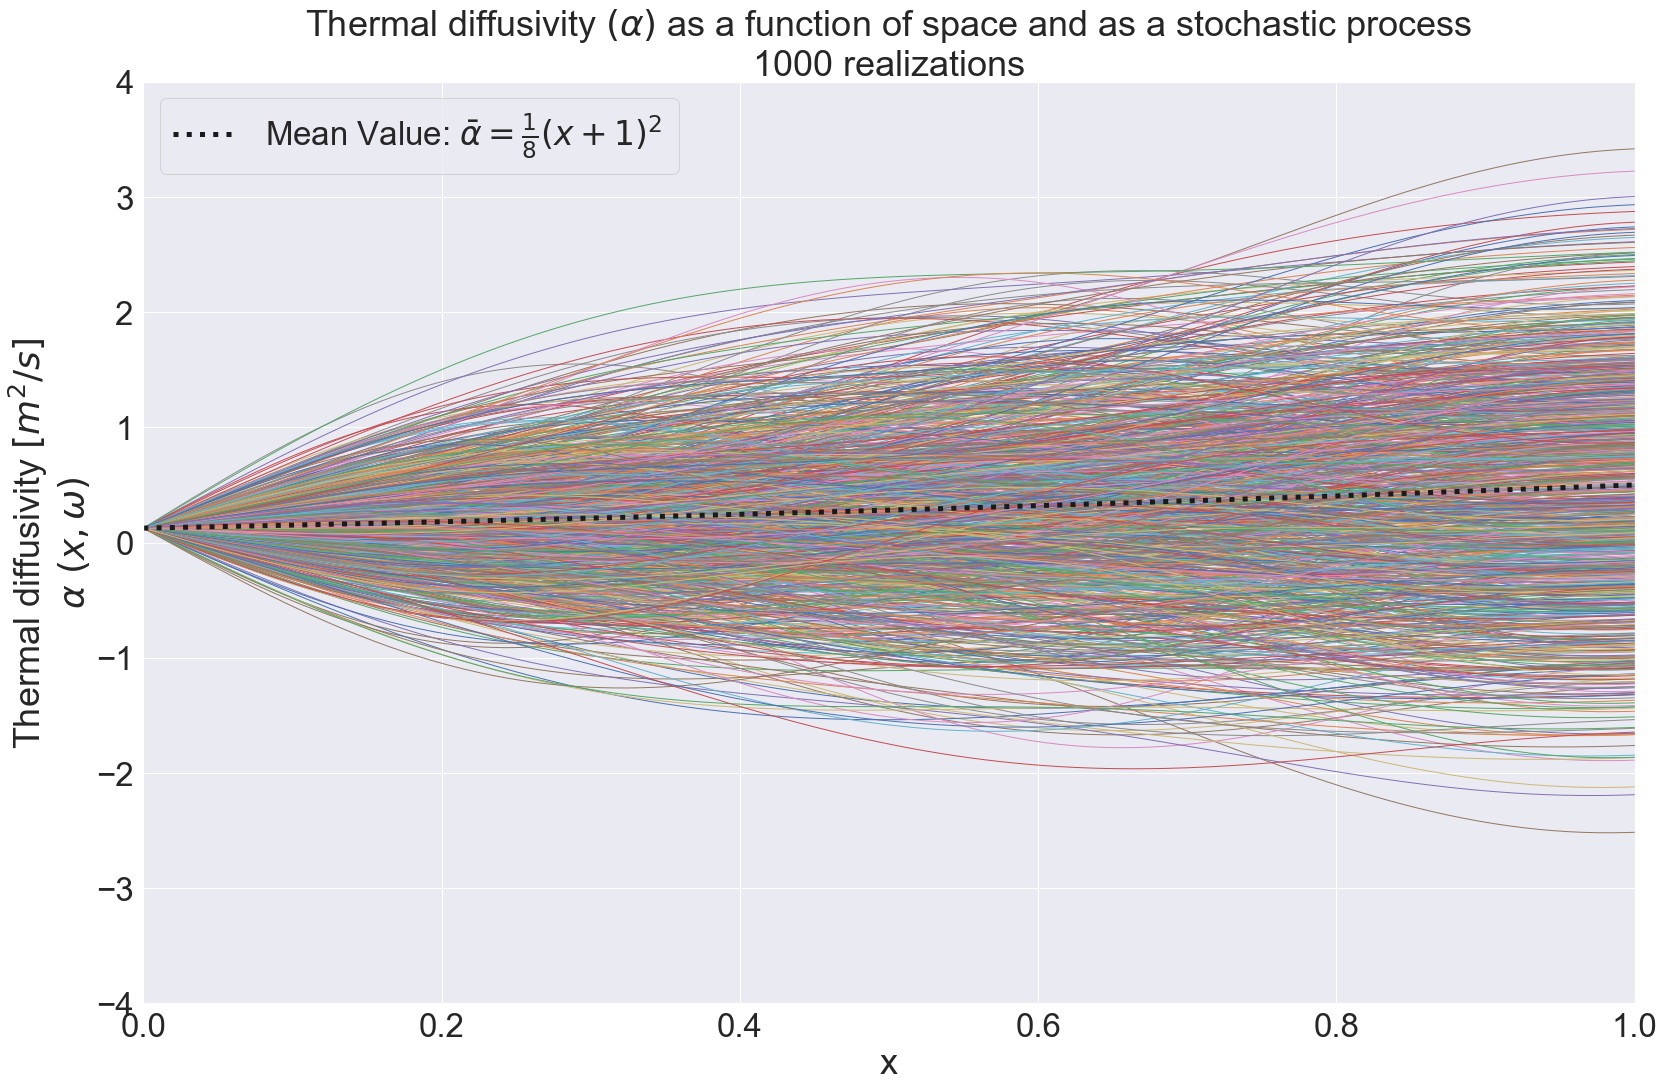

In [6]:
fig, ax = plt.subplots(ncols=1, figsize=(24, 16))
ax.set_ylim(-4,4)
ax.set_xlim(0,1)
for i in range(realizations):
    plt.plot(x_domain,realization_array[i,:], linewidth=1)
    
plt.plot(x_domain, mean_alpha, linewidth=5, ls=':', c='k', label=r'Mean Value: $\bar{\alpha}=\frac{1}{8}(x+1)^2$ ')    
ax.set_xlabel('x')
ax.set_ylabel('Thermal diffusivity ' + r'$ [m^2/s]$' +'\n' + r'$\alpha \ (x,\omega)$');
ax.set_title(r'Thermal diffusivity $(\alpha)$ as a function of space and as a stochastic process' + f'\n{realizations} realizations');
plt.legend();
fig.tight_layout()
plt.savefig('realizations_of_diffusivity')

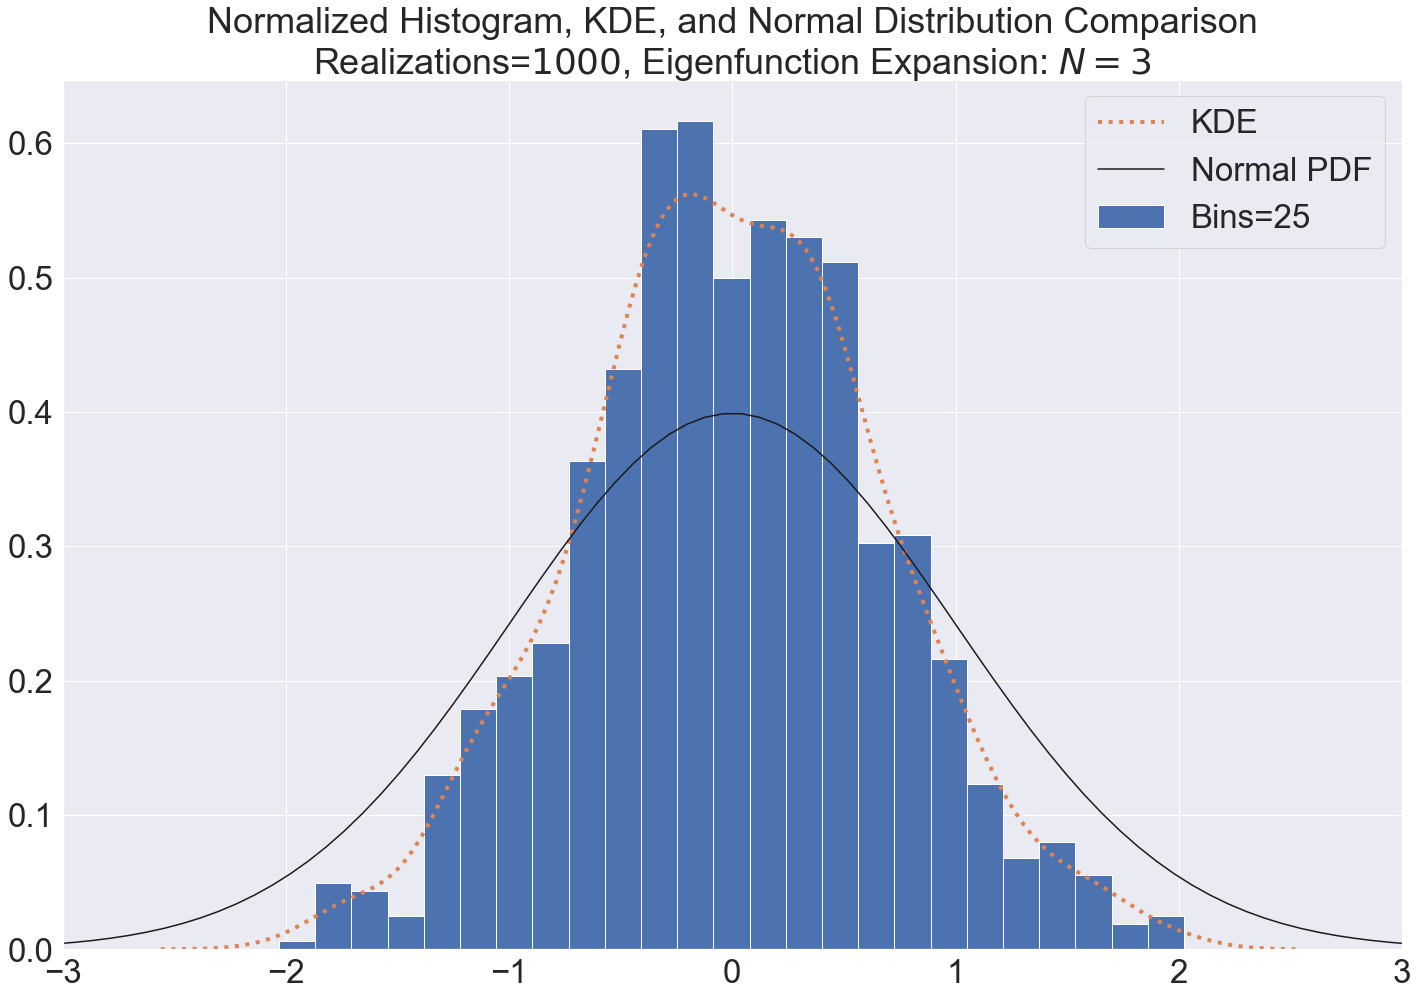

In [7]:
beta_half_point = realization_array[:,100] - alpha_bar(0.5)   # Expansion - mean of alpha

gaussian_range = np.linspace(-4,4,100)
gaussian_pdf = scipy.stats.norm.pdf(gaussian_range)
bin_count = 25

fig, ax = plt.subplots(ncols=1, figsize=(24, 16))
(bin_values, _, _) = plt.hist(beta_half_point, bins=bin_count, stacked=True, density=True,
                              label=f'Bins={bin_count}')  # plot Normalized Histogram
sns.kdeplot(beta_half_point, label='KDE', linestyle=':', linewidth=4)  # plot KDE  of sample distribution
plt.plot(gaussian_range, gaussian_pdf, label='Normal PDF', c='k')

ax.set_xlim(-3,3)
plt.title('Normalized Histogram, KDE, and Normal Distribution Comparison\n' + r'Realizations=${{{}}}$, Eigenfunction Expansion: $N= 3$'.format(realizations))
plt.legend();

In [8]:
first_6_eigens  = eigen_generator(np.arange(1,6+1))

y_values_6 = np.zeros((201, 6))

for i in range(6):  # generate the eigenfunctions from [0, 1] 
    y_values_6[:,i] = eigen_func(x_domain, first_6_eigens[i])

realization_array_6 = np.zeros((realizations, x_domain.shape[0]))

for i in range(realizations):
    realization_array_6[i,:]=mean_alpha + karhunen_loueve(first_6_eigens, y_values_6)    
    
beta_half_point_6 = realization_array_6[:,100] - alpha_bar(0.5)   # Expansion - mean of alpha

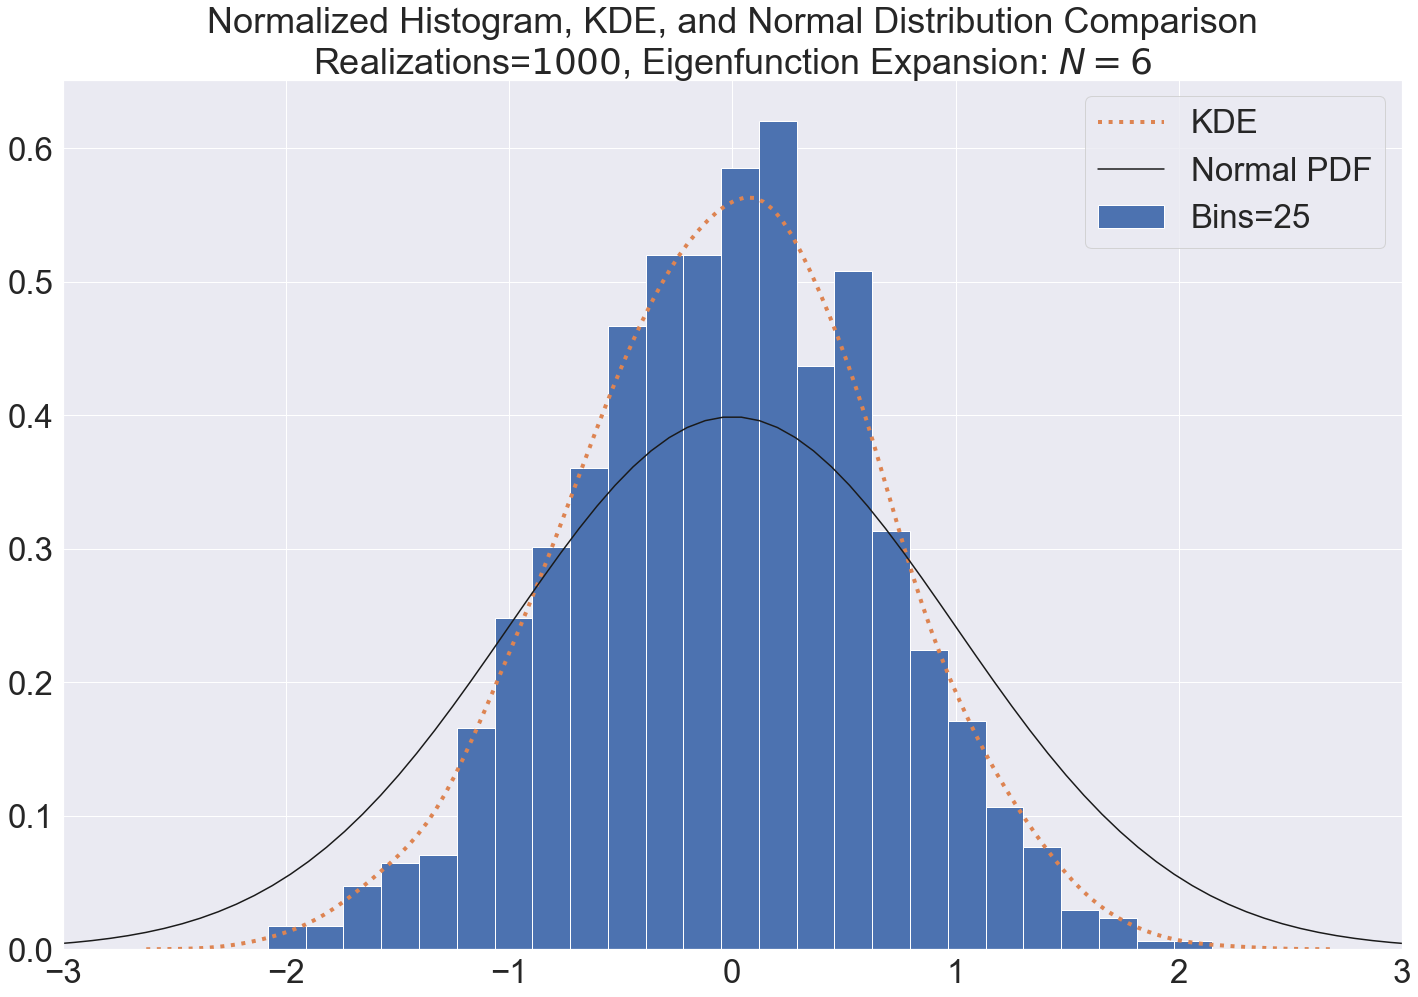

In [9]:
fig, ax = plt.subplots(ncols=1, figsize=(24, 16))
(bin_values, _, _) = plt.hist(beta_half_point_6, bins=bin_count, stacked=True, density=True,
                              label=f'Bins={bin_count}')  # plot Normalized Histogram
sns.kdeplot(beta_half_point_6, label='KDE', linestyle=':', linewidth=4)  # plot KDE  of sample distribution
plt.plot(gaussian_range, gaussian_pdf, label='Normal PDF', c='k')

ax.set_xlim(-3,3)
plt.title('Normalized Histogram, KDE, and Normal Distribution Comparison\n' + r'Realizations=${{{}}}$, Eigenfunction Expansion: $N= 6$'.format(realizations))
plt.legend();